<font color = 'green'> **Imputation of Missing Data**

<font color = 'green'> ITCS_3162
<font color = 'green'> Team Members
1. Fayliette Lewis
2. Sarah Williams
3. Daniel Isaac
4. Akshithaa Suresh


Introductory paragraph: 
Linear regression is a form of predictive analysis that serves the purpose of measuring the linear relationship between provided variables. Using the Towards Data Science article, ‘Understanding Regression using COVID-19 Dataset -- Detailed Analysis’, this notebook contains an implemented regression analysis of Chicago’s COVID-19 dataset. Processes covered include: data cleaning, dataset scaling, application of linear regression, and polynomial regression. 

[Link - Towards Data Science](https://towardsdatascience.com/)


[Link - Understanding Regression using COVID-19 Dataset — Detailed Analysis](https://towardsdatascience.com/understanding-regression-using-covid-19-dataset-detailed-analysis-be7e319e3a50)

In [1]:
#import all required libraries

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load the dataset
url = 'https://raw.githubusercontent.com/Ayushijain09/Regression-on-COVID-dataset/master/COVID-19_Daily_Testing.csv'
data = pd.read_csv(url)
data.head()

Date       Day  Tests Cases People Not-Positive - Total  \
0    03-01-20    Sunday      1     0                           1   
1    05-02-20  Saturday  2,431   705                       1,726   
2  05/14/2020  Thursday  4,098   772                       3,326   
3    03-05-20  Thursday     17     1                          16   
4    03-06-20    Friday     18     3                          15   

   People Tested - Age 0-17 People Tested - Age 18-29  \
0                         0                         0   
1                       129                       470   
2                       260                       805   
3                         4                         2   
4                         1                         5   

  People Tested - Age 30-39  People Tested - Age 40-49  \
0                         1                          0   
1                       458                        458   
2                       833                        685   
3                         0                          4   
4                         1                          3   

   People Tested - Age 50-59  ...  People Not-Positive - Age Unknown  \
0                          0  ...                                  0   
1                        412  ...                                  1   
2                        604  ...                                 16   
3                          3  ...                                  0   
4                          3  ...                                  1   

   People Not-Positive - Female  People Not-Positive - Male  \
0                             0                           1   
1                           898                         797   
2                         1,654                       1,424   
3                             7                           9   
4                             8                           7   

   People Not-Positive - Gender Unknown People Not-Positive - Latinx  \
0                                     0                            0   
1                                    31                          226   
2                                   248                          529   
3                                     0                            2   
4                                     0                            2   

  People Not-Positive - Asian Non-Latinx  \
0                                      0   
1                                     30   
2                                     43   
3                                      0   
4                                      0   

   People Not-Positive - Black Non-Latinx  \
0                                       0   
1                                     273   
2                                     430   
3                                       4   
4                                       1   

  People Not-Positive - White Non-Latinx  \
0                                      1   
1                                    225   
2                                    442   
3                                      2   
4                                      2   

   People Not-Positive - Other Race Non-Latinx  \
0                                            0   
1                                           51   
2                                          109   
3                                            1   
4                                            1   

   People Not-Positive - Unknown Race/Ethnicity  
0                                             0  
1                                           921  
2                                         1,773  
3                                             7  
4                                             9  

[5 rows x 59 columns]

In [3]:
#print information regarding the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 59 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Date                                          88 non-null     object
 1   Day                                           88 non-null     object
 2   Tests                                         89 non-null     object
 3   Cases                                         89 non-null     object
 4   People Not-Positive - Total                   89 non-null     object
 5   People Tested - Age 0-17                      89 non-null     int64 
 6   People Tested - Age 18-29                     89 non-null     object
 7   People Tested - Age 30-39                     89 non-null     object
 8   People Tested - Age 40-49                     89 non-null     int64 
 9   People Tested - Age 50-59                     89 non-null     int64 
 10  Peop

In [4]:
#data cleaning
data['Cases'] = data['Cases'].str.replace(',', '')
data['Tests'] = data['Tests'].str.replace(',', '')
data['Cases'] = pd.to_numeric(data['Cases'])     
data['Tests'] = pd.to_numeric(data['Tests'])

In [6]:
#plot the pairwise relationship of the dataset
#each variable will be shared by the x and y axis
from IPython.display import Image

sns_plot = sns.pairplot(data_numeric)
sns_plot.savefig("pairplot.png")

plt.clf() # Clean parirplot figure from sns 
Image(filename='pairplot.png') # Show pairplot as image

<Figure size 8280x8280 with 0 Axes>

In [7]:
#scaling the dataset for analysis/prediction
X = data['Tests'].values.reshape(-1,1)
y = data['Cases'].values.reshape(-1,1)

The linear model is: Y = 97.777 + 0.18572X


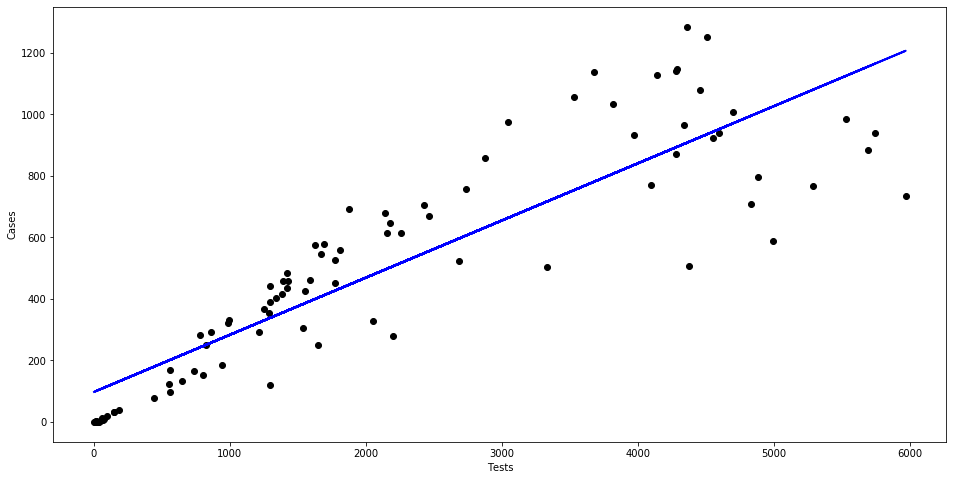

In [8]:
#applying linear regression
reg = LinearRegression()
reg.fit(X, y)
predictions = reg.predict(X)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
plt.figure(figsize=(16, 8))
plt.scatter(
    X,
    y,
    c='black'
)
plt.plot(
    X,
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Tests")
plt.ylabel("Cases")
plt.show()

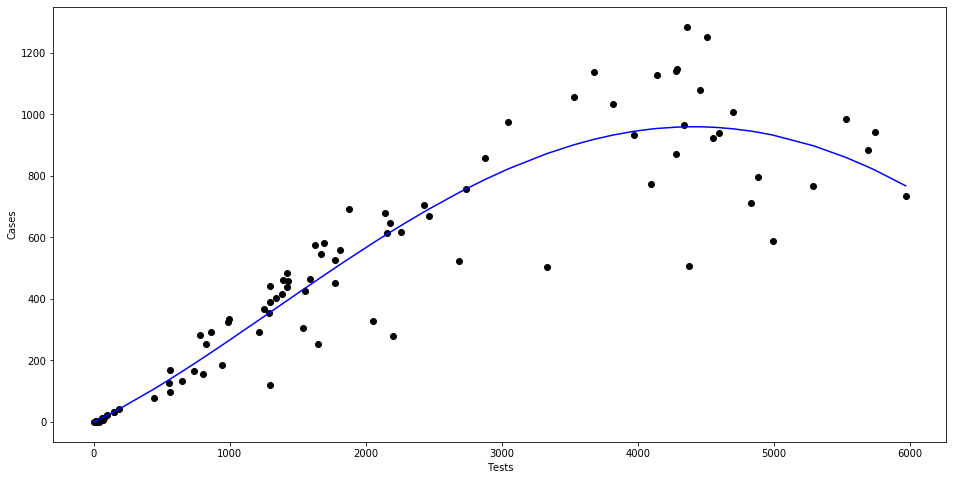

In [9]:
#polynomial regression
poly = PolynomialFeatures(degree =4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 
pred = lin2.predict(X_poly)
new_X, new_y = zip(*sorted(zip(X, pred)))
plt.figure(figsize=(16, 8))
plt.scatter(
    X,
    y,
    c='black'
)
plt.plot(
    new_X, new_y,
    c='blue'
)
plt.xlabel("Tests")
plt.ylabel("Cases")
plt.show()


<font color = 'black'> **If you were asked to perform the analysis on other states such as North Carlolina, can you obtain the data?  Are there any problems with state level data or is it all reported in exactly the same way?**

Data regarding COVID-19 can be found on government national public health websites like the CDC, with more detailed and local information listed on state government websites. North Carolina’s COVID statistics can be found on the NC Department of Health and Human Services (NCDHHS) website. There is always an inaccuracy issue regarding state level data as they are not reported the same way - while the CDC collects information through multiple surveillance systems (state, local, territorial, academic and commercial), state information is typically monitored through clinical testing done by laboratories, non-laboratory locations and other facilities that offer self or in-home testing. It is important to remember that this information can be inaccurate due to undiagnosed infections, lack of testing availability and other errors.